In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.DataFrame({
    'Service':[6,8,6,14.5],
    'Quality':[6,8,7,14.5],
    'Francais':[5,8,11,15.5],

    
})

In [3]:
df.index = ['Jean', 'Jacques', 'Aline', 'Emeline'] #设置索引，行名

In [4]:
Z=np.array([[-1,3,-2],
           [0,1,-1],
           [3,-1,-2],
           [2,-3,1]])
ind_ligne=3
ind_col=2
Z

array([[-1,  3, -2],
       [ 0,  1, -1],
       [ 3, -1, -2],
       [ 2, -3,  1]])

In [5]:
# Centrer reduit
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(Z)
Z

array([[-1.26491106,  1.34164079, -0.81649658],
       [-0.63245553,  0.4472136 ,  0.        ],
       [ 1.26491106, -0.4472136 , -0.81649658],
       [ 0.63245553, -1.34164079,  1.63299316]])

In [6]:
# Matrice de corrélation

#Z[:,ind_col]
df1=pd.DataFrame({"C1": Z[:,0], "C2": Z[:,1], "C3": Z[:,2]})
df1

mat_corr=df1.corr()
mat_corr=mat_corr.values
mat_corr

array([[ 1.        , -0.84852814,  0.25819889],
       [-0.84852814,  1.        , -0.73029674],
       [ 0.25819889, -0.73029674,  1.        ]])

In [7]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
coord
#2
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[2.25498344e+00 7.45016556e-01 9.09938426e-33]


In [8]:
# Verifier valeur propre   e+00= * 10の0次方  ； e-01 = 10の-1次方
D,V=np.linalg.eig(mat_corr)
D

array([2.25498344e+00, 7.45016556e-01, 2.08092261e-16])

In [9]:
#ratio de réprésentation des valeurs prores
# CTRap Valeur propre pourcentage
print([ratio for ratio in acp.explained_variance_ratio_])

[0.7516611478423584, 0.24833885215764165, 3.0331280881849954e-33]


In [10]:
#Vecteur prepro
V

array([[-0.5531024 ,  0.64521311,  0.52704628],
       [ 0.66556564, -0.03829921,  0.74535599],
       [-0.50109891, -0.76304208,  0.40824829]])

In [11]:
# ????
acp.components_

array([[ 0.5531024 , -0.66556564,  0.50109891],
       [ 0.64521311, -0.03829921, -0.76304208],
       [-0.52704628, -0.74535599, -0.40824829]])

In [12]:
coord

array([[-2.00172090e+00, -2.44499737e-01,  1.29450381e-16],
       [-6.47462672e-01, -4.25196529e-01,  2.21508111e-17],
       [ 5.88129794e-01,  1.45628638e+00,  8.65305529e-17],
       [ 2.06105377e+00, -7.86590112e-01,  1.07990467e-16]])

IndexError: index 4 is out of bounds for axis 0 with size 4

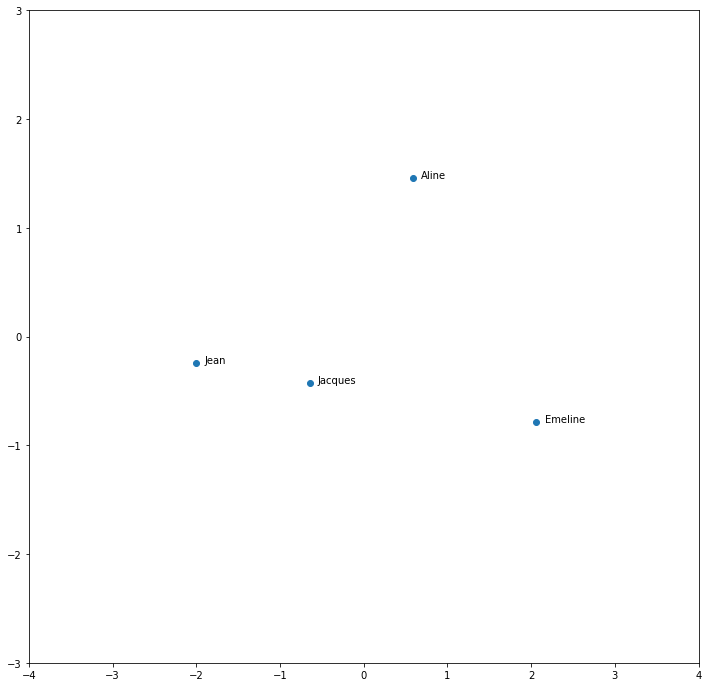

In [13]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse  坐标范围
axes.set_ylim(-3,3) #et en ordonnée

# placement des points 
plt.scatter(coord[:,0],coord[:,1])     #只取coord前两列
#placement des étiquettes des observations   
for i in range(9):
     plt.annotate(df.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()